<a href="https://colab.research.google.com/github/WeimusT/Quantitative_trading/blob/main/Kelly_Formula.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
spy_ticker = yf.Ticker("SPY")

In [20]:
spy_df = spy_ticker.history(period="3Y")
df = spy_df["Close"]

In [18]:
trainset = np.arange(0, 252*2)
testset = np.arange(252*2, spy_df.shape[0])
print("Train set: %i, %i" % (min(trainset), max(trainset)))
print("Test set: %i, %i" % (min(testset), max(testset)))

Train set: 0, 503
Test set: 504, 754


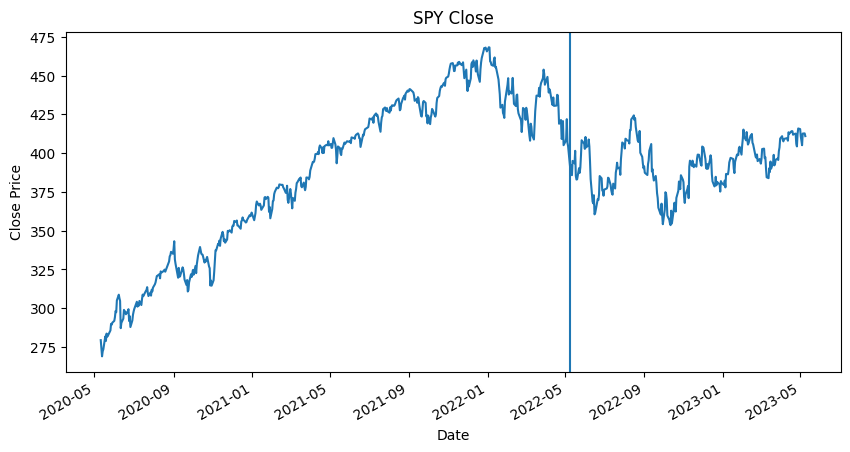

In [40]:
ax = spy_df["Close"].plot(figsize=[10, 5], title="SPY Close")
ax.set_ylabel("Close Price")
ax.axvline(df.iloc[trainset].index[-1])

In [26]:
# Buy and hold strategy - train
dailyret = df.pct_change()
excessret = dailyret - 0.04 / 252 # assuming 4% risk free rate
bnhmean = np.mean(dailyret.iloc[trainset])
bnhstd = np.std(dailyret.iloc[trainset])
bnhsharpe = np.sqrt(252) * bnhmean  / bnhstd
print("Annualized Sharpe (Train): %.4f" % bnhsharpe)

Annualized Sharpe (Train): 1.0638


In [27]:
# Buy and hold strategy - test
dailyret = df.pct_change()
excessret = dailyret - 0.04 / 252 # assuming 4% risk free rate
bnhmean = np.mean(dailyret.iloc[testset])
bnhstd = np.std(dailyret.iloc[testset])
bnhsharpe = np.sqrt(252) * bnhmean  / bnhstd
print("Annualized Sharpe (Test): %.4f" % bnhsharpe)

Annualized Sharpe (Test): 0.3322
